## Polynomial On Housing Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\housing.csv")
df

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000
1,6.421,9.14,17.8,453600
2,7.185,4.03,17.8,728700
3,6.998,2.94,18.7,701400
4,7.147,5.33,18.7,760200
...,...,...,...,...
484,6.593,9.67,21.0,470400
485,6.120,9.08,21.0,432600
486,6.976,5.64,21.0,501900
487,6.794,6.48,21.0,462000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 15.4 KB


In [4]:
df.isna().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [5]:
df.shape

(489, 4)

In [6]:
df.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


## Build Model on Linear Regression

In [7]:
x=df.drop(columns=["MEDV"])
y=df["MEDV"]

In [8]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)
model.score(x,y)

0.7176275212982738

In [9]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=(0.2))
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain)

0.7373099563896293

In [10]:
ypred=model.predict(xtest)

In [11]:
pd.DataFrame({"Actual":ytest,"Predicted":ypred})

,Actual,Predicted
86,472500,434000.570833
99,697200,644058.051644
35,396900,447634.465029
23,304500,282933.025336
49,407400,372637.774898
...,...,...
169,495600,553560.781040
243,520800,563299.018501
480,384300,385366.810818
445,409500,411320.403926


In [12]:
residual=ytest-ypred
residual

86     38499.429167
99     53141.948356
35    -50734.465029
23     21566.974664
49     34762.225102
           ...     
169   -57960.781040
243   -42499.018501
480    -1066.810818
445    -1820.403926
51    -87730.930098
Name: MEDV, Length: 98, dtype: float64

In [13]:
np.mean(residual)

8383.310498563256

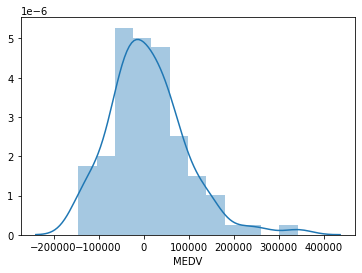

In [14]:
sns.distplot(residual)

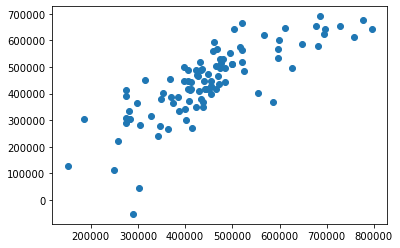

In [15]:
plt.scatter(ytest,ypred)

## build model on Polynomial Regression

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
pf=PolynomialFeatures(degree=5)

In [18]:
quad=pf.fit_transform(x)

In [19]:
 X_train, X_test, y_train, y_test = train_test_split(quad, y, test_size=0.2)

In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
model.score(X_train,y_train)

0.8255653143383102

In [22]:
model.score(X_test,y_test)

0.3931511028376963

In [23]:
pred=model.predict(X_test)

In [24]:
pd.DataFrame({"Actual":y_test,"Predicted":pred})

,Actual,Predicted
339,480900,475122.987915
478,485100,384474.989014
109,407400,357181.681519
311,428400,429553.542236
270,953400,863754.563477
...,...,...
67,462000,435986.324097
236,369600,434352.568848
234,466200,435249.575806
445,409500,385182.657837


In [25]:
res=ypred-y_test
res

339    -46899.429167
478    158958.051644
109     40234.465029
311   -145466.974664
270   -580762.225102
           ...      
67      91560.781040
236    193699.018501
234    -80833.189182
445      1820.403926
386    343930.930098
Name: MEDV, Length: 98, dtype: float64

In [26]:
np.mean(res)

-13933.310498563256

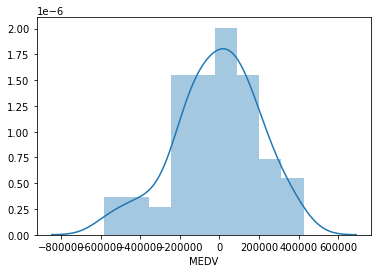

In [27]:
sns.distplot(res)

### Polynomial provides the best approximation of the relationship between the dependent and independent variable.